# Mini Projeto de Análise de Dados
### O que temos?
Temos os dados de 2019 de uma empresa de prestação de serviços.

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que a Empresa deseja? 

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

2. Qual foi o faturamento da empresa?

3. Qual o % de funcionários que já fechou algum contrato?

4. Calcule o total de contratos que cada área da empresa já fechou

5. Calcule o total de funcionários por área

6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [3]:
# importar bibliotecas
import pandas as pd

In [13]:
# importar base de dados
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')
clientes_df = pd.read_csv('CadastroClientes.csv' , sep=';', decimal=',') 
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv' , sep=';', decimal=',')

In [14]:
# vizualozando bases de dados
display(servicos_df.head())
display(clientes_df.head())
display(funcionarios_df.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


In [11]:
# Valor Total da Folha Salarial
funcionarios_df['Folha Salarial'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('O valor da Folha Salarial deste mês são: R${:,}'.format(sum(funcionarios_df['Folha Salarial'])))

O valor da Folha Salarial deste mês são: R$2,717,493.22


In [33]:
# Total Faturamento
faturamento_df = servicos_df[['ID Cliente' , 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
print('O Total de Faturamento são: R${:,.2f}'.format(sum(faturamento_df['Valor Contrato Mensal'] * faturamento_df['Tempo Total de Contrato (Meses)'])))

O Total de Faturamento são: R$5,519,160.00


In [43]:
# % Funcionarios Contratos Fechados
funcionarios_total_df = funcionarios_df['ID Funcionário'].value_counts()
funcionarios_contratos_fechados_df = servico_df['ID Funcionário'].unique()
print('O % de Funcionarios com Contrato fechados são: {:.2%}'.format(len(funcionarios_contratos_fechados_df)/len(funcionarios_total_df)))

O % de Funcionarios com Contrato fechados são: 86.84%


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: title={'center': 'Analise por Área'}>

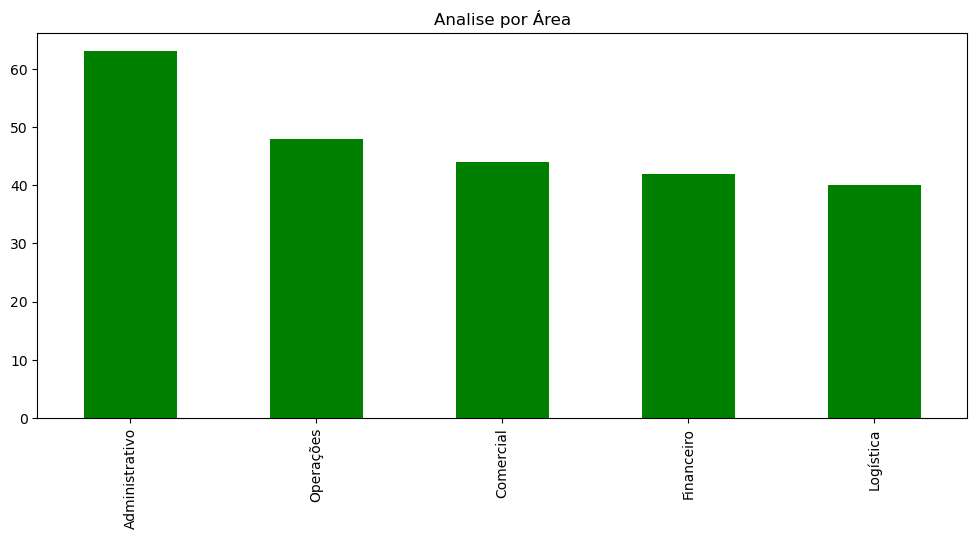

In [70]:
# Analise Contratos por Área
contratos_area_df = servicos_df[['ID Funcionário','Tempo Total de Contrato (Meses)']].merge(funcionarios_df[['ID Funcionário','Area']],on = "ID Funcionário")
contratos_area_df = contratos_area_df['Area'].value_counts()
print(contratos_area_df)
contratos_area_df.plot(kind = 'bar' , color='green', figsize=(12, 5), title='Analise por Área', xlabel="")

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: title={'center': 'Ticket Medio Mensal'}>

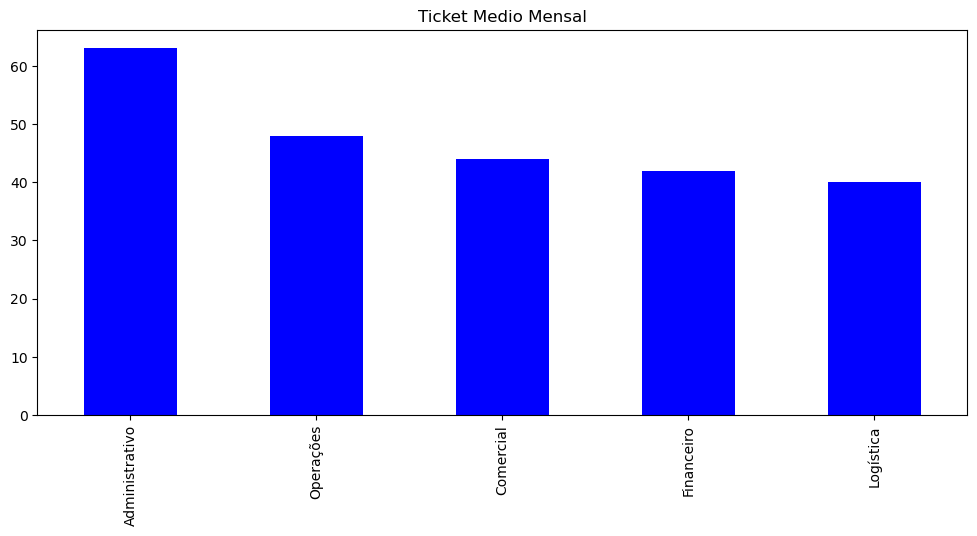

In [79]:
# Funcionarios por Area
funcionarios_area_df = funcionarios_df['Area'].value_counts()
print(funcionarios_area_df)
contratos_area_df.plot(kind = 'bar' , color='blue', figsize=(12, 5), title='Ticket Medio Mensal', xlabel="")

In [80]:
# Ticket Medio Mensal
ticket_medio_df = clientes_df['Valor Contrato Mensal'].mean()
print('O faturamento medio são: R${:,.2f}'.format(ticket_medio_df))

O faturamento medio são: R$2,502.56
